In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('./ClassicDisco.csv')
data.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Boogie Oogie Oogie,A Taste Of Honey,A Taste Of Honey,1978,245173,4,0.797,0.548,2,-9.228,0,0.0492,0.0401,0.000010,0.0994,0.868,123.686,53
1,Disco Dancin' - 2004 - Remastered,A Taste Of Honey,A Taste Of Honey,1978,210493,4,0.751,0.570,2,-11.645,1,0.0813,0.3710,0.000020,0.1230,0.770,103.408,11
2,Distant,A Taste Of Honey,A Taste Of Honey,1978,260053,4,0.468,0.512,2,-10.187,1,0.1380,0.7820,0.000020,0.2020,0.714,163.400,13
3,Do It Good,A Taste Of Honey,Another Taste (Expanded Edition),1978,342826,4,0.699,0.740,3,-8.625,0,0.0289,0.0714,0.000002,0.1650,0.889,104.168,17
4,If We Loved,A Taste Of Honey,A Taste Of Honey,1978,266200,4,0.463,0.459,6,-11.600,1,0.0296,0.7640,0.000003,0.1580,0.300,129.267,13


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             724 non-null    object 
 1   Artist            724 non-null    object 
 2   Album             724 non-null    object 
 3   Year              724 non-null    int64  
 4   Duration          724 non-null    int64  
 5   Time_Signature    724 non-null    int64  
 6   Danceability      724 non-null    float64
 7   Energy            724 non-null    float64
 8   Key               724 non-null    int64  
 9   Loudness          724 non-null    float64
 10  Mode              724 non-null    int64  
 11  Speechiness       724 non-null    float64
 12  Acousticness      724 non-null    float64
 13  Instrumentalness  724 non-null    float64
 14  Liveness          724 non-null    float64
 15  Valence           724 non-null    float64
 16  Tempo             724 non-null    float64
 1

In [7]:
data.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,724.000000,7.240000e+02,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,1977.872928,3.013971e+05,3.970994,0.691912,0.665481,5.356354,-10.043793,0.574586,0.060252,0.193440,0.094249,0.173522,0.762259,118.746369,32.486188
std,4.126678,1.000937e+05,0.175981,0.127139,0.176193,3.741299,3.130664,0.494747,0.038666,0.217953,0.216858,0.163982,0.192723,18.784116,19.201734
min,1967.000000,1.270530e+05,3.000000,0.293000,0.034800,0.000000,-23.920000,0.000000,0.023200,0.000017,0.000000,0.017300,0.085500,63.103000,0.000000
25%,1976.000000,2.306595e+05,4.000000,0.618750,0.549750,2.000000,-12.124500,0.000000,0.036500,0.028400,0.000012,0.070600,0.671000,108.563000,17.000000
50%,1978.000000,2.808165e+05,4.000000,0.708000,0.689000,5.000000,-9.701000,1.000000,0.049300,0.111000,0.000747,0.106000,0.821500,118.718000,30.500000
75%,1980.000000,3.534562e+05,4.000000,0.784000,0.805750,9.000000,-7.635750,1.000000,0.069600,0.278250,0.032700,0.224250,0.909000,126.461250,47.000000
max,2020.000000,1.008533e+06,5.000000,0.980000,0.985000,11.000000,-3.384000,1.000000,0.386000,0.962000,0.941000,0.984000,0.984000,203.669000,85.000000


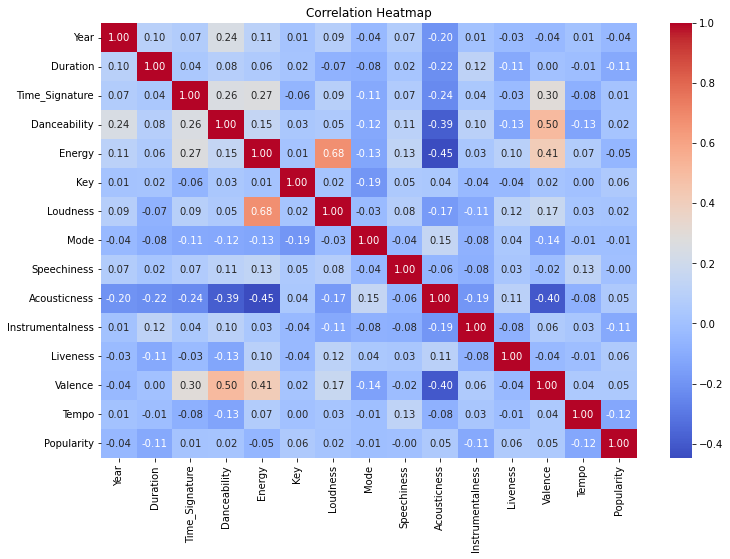

In [9]:
numeric_df = data.select_dtypes(include=[np.number])

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Define the features and target variable
X = numeric_df.drop(columns=['Popularity'])
y = numeric_df['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(388.59804567025697, 0.03688501685958723)